# Use RANSAC to remove outlier key point matches and fit a transformation model between two images.

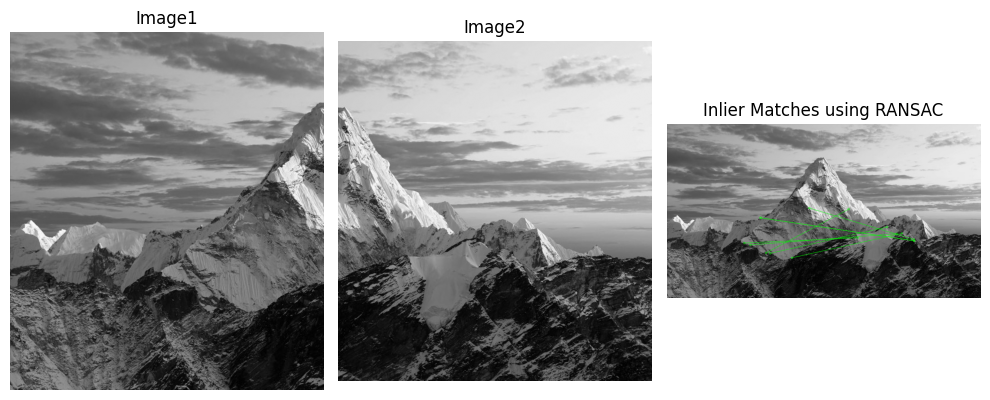

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the two images
img1 = cv2.imread('mou1.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('mou2.jpg', cv2.IMREAD_GRAYSCALE)

# 1. Detect ORB keypoints and descriptors
orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# 2. Match descriptors using BFMatcher with Hamming distance
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)

# Check if matches were found
if not matches:
    print("Error: No matches found between the images.")
    # Handle the case appropriately (e.g., exit or skip homography calculation)
else:
    matches = sorted(matches, key=lambda x: x.distance)

    # 3. Extract location of good matches
    pts1 = np.float32([kp1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
    pts2 = np.float32([kp2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

    # 4. Use RANSAC to estimate a homography matrix and remove outliers
H, mask = cv2.findHomography(pts1, pts2, cv2.RANSAC, ransacReprojThreshold=5.0)
matches_mask = mask.ravel().tolist()

# 5. Draw inlier matches
img_matches = cv2.drawMatches(
    img1, kp1, img2, kp2, matches, None,
    matchColor=(0, 255, 0),
    matchesMask=matches_mask,
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)

# Show result
plt.figure(figsize=(10, 6))
titles = ['Image1', 'Image2', 'Inlier Matches using RANSAC']
images = [img1, img2, img_matches]

for i in range(3):
    plt.subplot(1, 3, i + 1)
    if i < 2:
        plt.imshow(images[i], cmap='gray')
    else:
        plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()